# 均值回归_Mean Reverting Strategy

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings; warnings.simplefilter('ignore')       #忽略警告信息；

In [2]:
import numpy as np
import pandas as pd
import tushare as ts

### 策略思想

均值回归策略应用了股市投资中经典的高抛低吸思想，该类型策略一般在震荡市中表现优异；
但是在单边趋势行情中一般表现糟糕，往往会大幅跑输市场；

### 前导知识

In [3]:
a = pd.DataFrame([np.NaN,1,1,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,0,0])

In [4]:
a               #NaN在帮助我们计算策略信号时很有用；

,0
0,NaN
1,1.0
2,1.0
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.0


In [5]:
a.ffill().fillna(0)                #涉及NaN的应用和处理；向前填充；

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,0.0


### 1. 数据准备 & 回测准备

In [6]:
data = ts.get_k_data('hs300', start = '2010-01-01', end='2019-04-10')[[ 'date','close']]

In [7]:
data.rename(columns={'close': 'price'}, inplace=True)

In [8]:
data.set_index('date', inplace = True)

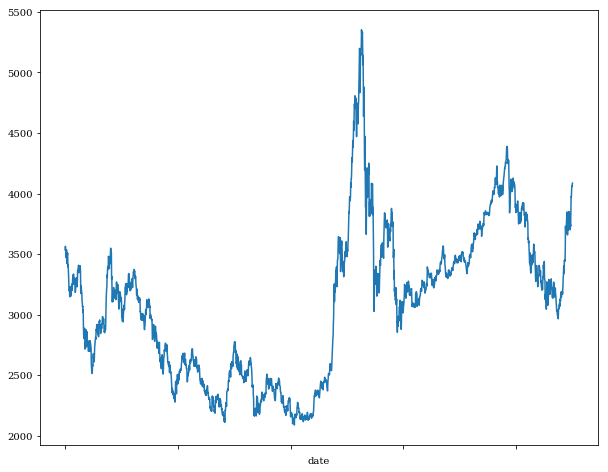

In [9]:
data['price'].plot(figsize = (10,8))

In [10]:
data.head()

,price
date,
2010-01-04,3535.229
2010-01-05,3564.038
2010-01-06,3541.727
2010-01-07,3471.456
2010-01-08,3480.130


### 2. 策略开发思路

In [11]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [12]:
SMA = 50

In [13]:
data['SMA'] = data['price'].rolling(SMA).mean()

In [14]:
data.tail()

,price,returns,SMA
date,,,
2019-04-03,4022.16,0.012728,3563.9754
2019-04-04,4062.23,0.009913,3582.9916
2019-04-08,4057.23,-0.001232,3600.7728
2019-04-09,4075.43,0.004476,3618.5686
2019-04-10,4085.85,0.002554,3637.4192


In [15]:
threshold = 250              #阈值；

In [16]:
data['distance'] = data['price'] - data['SMA']

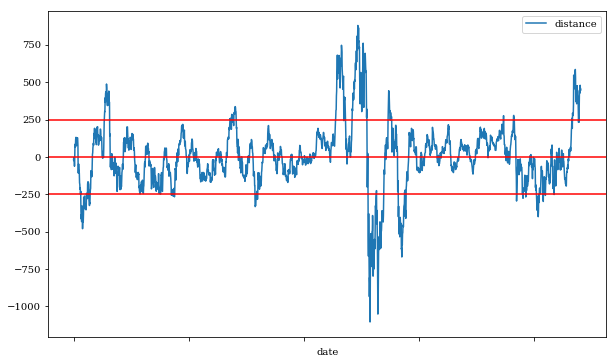

In [17]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')          # 水平线
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

In [18]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)           #核心精髓；

In [19]:
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])

In [20]:
data['position'] = np.where(data['distance'] *
            data['distance'].shift(1) < 0, 0, data['position'])

In [21]:
data['position'] = data['position'].ffill().fillna(0)

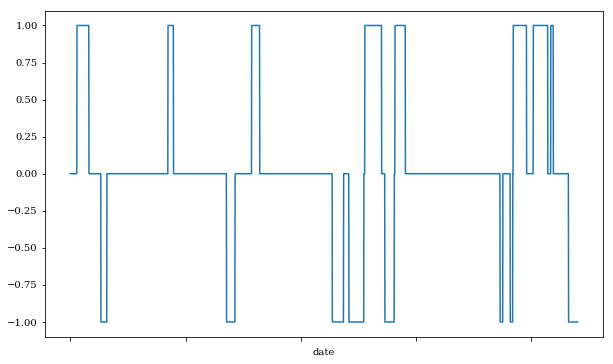

In [22]:
data['position'].ix[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6))

### 3. 计算策略年化收益并可视化

In [23]:
data['strategy'] = data['position'].shift(1) * data['returns']

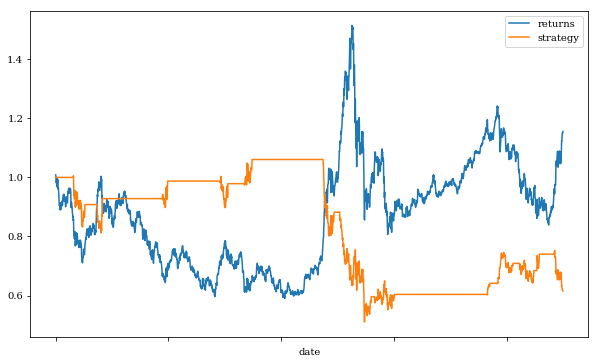

In [24]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

声明：本资料仅限内部研究和交流使用，切勿外传。